Given the data on KCSE performance, explore the data and generate a report on your findings.

Objectives:

1. Percentage change in enrollment for both genders ✅
2. Percentage change in performance for both genders ✅
3. Comparison of distribution of genders per grade per year✅
4. Yearly gender that performed the best✅
5. Overall performance yearly✅



# Packages

In [1]:
!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: pytz, python-dateutil, numpy
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, arviz, altair


In [2]:
!pip show numpy


Name: numpy
Version: 1.21.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: xgboost, xarray, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, scikit-image, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pycocotools, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, folium, fix-yahoo-finance, fbpro

In [3]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, numpy, pandas, matplotlib
Required-by: missingno


In [4]:
!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, cycler, kiwisolver, pyparsing, python-dateutil
Required-by: seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


# Imports
Import the relevant libraries

- pandas : Powerful data structures for data analysis, time series, and statistics
- Numpy  : NumPy is the fundamental package for array computing with Python.
- Seaborn :statistical data visualization
- Matplotlib : Python plotting package
- re : Regex

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# regex
import re

In [6]:
df= pd.read_csv('/content/KCSE_2016 (1).csv')

In [7]:
df.head()

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E
0,FEMALE(2016),58,2685,6581,10204,13649,17238,22960,30979,41632,57487,77718,18007
1,MALE(2016),83,1960,4394,7012,10096,14969,21832,30047,39319,54648,72211,15322
2,ALL(2016),141,4645,10975,17216,23745,32207,44792,61026,80951,112135,149929,33399
3,MALE(2015),2024,7952,13517,19826,25312,29556,33437,37482,40181,40442,25531,3127
4,FEMALE(2015),661,4117,8410,13634,19269,25214,31476,36633,38976,39113,23127,2223


Checking for null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  45 non-null     object
 1   A       45 non-null     int64 
 2   A-      45 non-null     int64 
 3   B+      45 non-null     int64 
 4   B       45 non-null     int64 
 5   B-      45 non-null     int64 
 6   C+      45 non-null     int64 
 7   C       45 non-null     int64 
 8   C-      45 non-null     int64 
 9   D+      45 non-null     int64 
 10  D       45 non-null     int64 
 11  D-      45 non-null     int64 
 12  E       45 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 4.7+ KB


Store all grades into a list

In [9]:
grades = df.columns[1:]
grades

Index(['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'E'], dtype='object')

Extract years from the Gender column and create a new column for year

In [10]:
def extract_years(df):
  """
    Takes in a df and extracts the years from the gender column

    @params : 
            df (pandas dataframe)
    @returns 
            df (pandas dataframe)
  """
  # extract the year from the gender column using regex  
  df['Year'] = df['Gender'].apply(lambda x: int(re.findall(r'\b\d+\b', x)[0]))
  # sort the df in descending order on the year column from 2020 - 2006
  df = df.sort_values(by='Year', ascending=True)
  return df
 

In [11]:
df = extract_years(df)

In [12]:
df.head()

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year
8,ALL(2006),217,880,1641,2399,3342,4442,5538,6492,6937,6804,5544,1731,2006
6,MALE(2006),148,638,1195,1627,2108,2569,2984,3299,3418,3291,2635,834,2006
7,FEMALE(2006),69,242,446,772,1234,1873,2554,3193,3519,3513,2909,897,2006
11,ALL(2007),160,754,1632,2605,3607,4971,6179,7048,7538,7223,5686,1569,2007
10,FEMALE(2007),50,191,473,844,1339,2100,2865,3439,3817,3730,2924,790,2007


In [13]:
def get_grade_score(grade,students):
  """
    Returns the total score for all the students per grade
    @params :
            - grade  (string)
            - students (number)
    @returns
            - score (number)
  """  
  if grade == 'A':
    return students * 12
  elif grade == 'A-':
    return students * 11
  elif grade == 'B+':
    return students * 10
  elif grade == 'B':
    return students * 9
  elif grade == 'B-':
    return students * 8
  elif grade == 'C+':
    return students * 7
  elif grade == 'C':
    return students * 6
  elif grade == 'C-':
    return students * 5
  elif grade == 'D+':
    return students * 4
  elif grade == 'D':
    return students * 3
  elif grade == 'D-':
    return students * 2
  elif grade == 'E':
    return students * 1
      
def calculate_sum_grade(df):
    """
      Applies the get_grade_score function to every grade column on the dataframe and returns the updated df
      @params :
              - df  (pandas df)            
      @returns
              - df (pandas df)
  """
    # iterate over the grades list 
    for grade in grades:
      print("Working on :", grade)  
      # dynamically create a columns eg A_Score, B_Score etc
      df[f'{grade}_Score'] = df[grade].apply(lambda x : get_grade_score(grade,x))
      
    return df
    


def get_mean_score_grade(score):
    """
      Returns a grade given a score
      @params :
              - score  (number)          
      @returns
              - grade (string)
  """
  # round off the score to 2dp
    score = round(score,2)
    if 80 < score > 100:
      return 'A'
    if 75 < score > 79.99:
      return 'A-'
    if 70 < score > 74.99:
      return 'B+'
    if 65 < score > 69.99:
      return 'B'
    if 60 < score > 64.99:
      return 'B-'
    if 55 < score > 59.99:
      return 'C+'
    if 50 < score > 54.99:
      return 'C'
    if 45 < score > 49.99:
      return 'C-'
    if 40 < score > 44.99:
      return 'D+'
    if 35 < score > 39.99:
      return 'D'
    if 30 < score > 34.99:
      return 'D-'
    if score < 29.99:
      return 'E'


def get_gender(value):
      """
      Returns the gender F- female M-male A-all
      @params :
              - value  (string)           
      @returns
              - gender  (string)
    """
      if 'FEMALE' in value:       
        return 'F'
      elif  'ALL' in value:
          return 'A'
      elif value.startswith('MALE'):
          return 'M'
  


def additional_rows(df):
    """
      Returns the total score for all the students per grade
      @params :
              - df  (pandas df)           
      @returns
              - df  (pandas df)
    """
   
    # compute addition row wise to get all students that participated that year  
    df['Total_Students']= df[grades].sum(axis=1)
    # get total score for all the students per grade
    df = calculate_sum_grade(df)  
    # get total score for the year 
    df['TotalScore'] = df[[col for col in df.columns if '_Score' in col]].sum(axis=1)
    # get mean score for the year
    df['Meanscore'] = ((df['TotalScore'] /  df['Total_Students']) * 100)/7
    # get mean grade for the year
    df['MeanGrade'] = df.apply(lambda row : get_mean_score_grade(row['Meanscore']), axis = 1)
    # get % change in performance
    df['PerformanceChange'] = df['Meanscore'].pct_change()
    # get % change in attendance 
    df['AttendanceChange'] = df['Total_Students'].pct_change()
    # Gender
    df['Get_Gender'] =  df.apply(lambda row : get_gender(row['Gender']), axis = 1)
    df['Year_Str'] = df.Year.astype(str)
    return df

In [14]:
df = additional_rows(df)

Working on : A
Working on : A-
Working on : B+
Working on : B
Working on : B-
Working on : C+
Working on : C
Working on : C-
Working on : D+
Working on : D
Working on : D-
Working on : E


In [15]:
df.head()

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year,Total_Students,A_Score,A-_Score,B+_Score,B_Score,B-_Score,C+_Score,C_Score,C-_Score,D+_Score,D_Score,D-_Score,E_Score,TotalScore,Meanscore,MeanGrade,PerformanceChange,AttendanceChange,Get_Gender,Year_Str
8,ALL(2006),217,880,1641,2399,3342,4442,5538,6492,6937,6804,5544,1731,2006,45967,2604,9680,16410,21591,26736,31094,33228,32460,27748,20412,11088,1731,234782,72.966010,B,NaN,NaN,A,2006
6,MALE(2006),148,638,1195,1627,2108,2569,2984,3299,3418,3291,2635,834,2006,24746,1776,7018,11950,14643,16864,17983,17904,16495,13672,9873,5270,834,134282,77.520176,B+,0.062415,-0.461657,M,2006
7,FEMALE(2006),69,242,446,772,1234,1873,2554,3193,3519,3513,2909,897,2006,21221,828,2662,4460,6948,9872,13111,15324,15965,14076,10539,5818,897,100500,67.655355,B-,-0.127255,-0.142447,F,2006
11,ALL(2007),160,754,1632,2605,3607,4971,6179,7048,7538,7223,5686,1569,2007,48972,1920,8294,16320,23445,28856,34797,37074,35240,30152,21669,11372,1569,250708,73.134503,B,0.080986,1.307714,A,2007
10,FEMALE(2007),50,191,473,844,1339,2100,2865,3439,3817,3730,2924,790,2007,22562,600,2101,4730,7596,10712,14700,17190,17195,15268,11190,5848,790,107920,68.332341,B-,-0.065662,-0.539288,F,2007


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,45.0,6.912444e+02,839.285063,50.000000,114.000000,2.690000e+02,8.930000e+02,3.073000e+03
A-,45.0,3.537022e+03,3264.360417,191.000000,880.000000,2.685000e+03,5.796000e+03,1.206900e+04
B+,45.0,1.031360e+04,24454.447750,446.000000,1787.000000,5.612000e+03,1.097500e+04,1.663900e+05
B,45.0,1.094000e+04,8771.849600,772.000000,2605.000000,9.803000e+03,1.596200e+04,3.346000e+04
B-,45.0,1.502062e+04,11722.123637,1234.000000,3607.000000,1.364900e+04,2.184500e+04,4.458100e+04
C+,45.0,1.977036e+04,15239.274327,1873.000000,4971.000000,1.723800e+04,2.786000e+04,5.799900e+04
C,45.0,2.611316e+04,20312.201576,2554.000000,6179.000000,2.401500e+04,4.047400e+04,8.545800e+04
C-,45.0,3.320991e+04,25950.655368,3193.000000,7048.000000,3.158200e+04,5.412800e+04,1.094540e+05
D+,45.0,3.931089e+04,30758.103224,3418.000000,7538.000000,3.874900e+04,5.837100e+04,1.178980e+05
D,45.0,4.732213e+04,40124.848718,3291.000000,7223.000000,3.911300e+04,6.980900e+04,1.479180e+05


In [17]:
# create a female only dataframe
FEMALE_DF = df[df['Get_Gender']== 'F']
# reset index
FEMALE_DF.reset_index(drop=True, inplace=True)
# view df
FEMALE_DF.head()

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year,Total_Students,A_Score,A-_Score,B+_Score,B_Score,B-_Score,C+_Score,C_Score,C-_Score,D+_Score,D_Score,D-_Score,E_Score,TotalScore,Meanscore,MeanGrade,PerformanceChange,AttendanceChange,Get_Gender,Year_Str
0,FEMALE(2006),69,242,446,772,1234,1873,2554,3193,3519,3513,2909,897,2006,21221,828,2662,4460,6948,9872,13111,15324,15965,14076,10539,5818,897,100500,67.655355,B-,-0.127255,-0.142447,F,2006
1,FEMALE(2007),50,191,473,844,1339,2100,2865,3439,3817,3730,2924,790,2007,22562,600,2101,4730,7596,10712,14700,17190,17195,15268,11190,5848,790,107920,68.332341,B-,-0.065662,-0.539288,F,2007
2,FEMALE(2008),66,274,596,920,1417,2129,2946,3618,4043,4150,3593,1376,2008,25128,792,3014,5960,8280,11336,14903,17676,18090,16172,12450,7186,1376,117235,66.650180,B-,-0.137069,-0.048542,F,2008
3,FEMALE(2009),58,218,553,974,1572,2388,3216,3996,4447,4514,3897,1326,2009,27159,696,2398,5530,8766,12576,16716,19296,19980,17788,13542,7794,1326,126408,66.490982,B-,-0.125198,-0.153714,F,2009
4,FEMALE(2010),97,344,744,1219,1875,2722,3637,4389,4734,4769,4012,1304,2010,29846,1164,3784,7440,10971,15000,19054,21822,21945,18936,14307,8024,1304,143751,68.806062,B-,-0.116006,-0.149759,F,2010


In [18]:
# create a male only df. Use starts with since if we say contains, 'male' is also in female
MALE_DF =  df[df['Get_Gender']== 'M']
# reset index
MALE_DF.reset_index(drop=True, inplace=True)
# view df
MALE_DF.head()

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year,Total_Students,A_Score,A-_Score,B+_Score,B_Score,B-_Score,C+_Score,C_Score,C-_Score,D+_Score,D_Score,D-_Score,E_Score,TotalScore,Meanscore,MeanGrade,PerformanceChange,AttendanceChange,Get_Gender,Year_Str
0,MALE(2006),148,638,1195,1627,2108,2569,2984,3299,3418,3291,2635,834,2006,24746,1776,7018,11950,14643,16864,17983,17904,16495,13672,9873,5270,834,134282,77.520176,B+,0.062415,-0.461657,M,2006
1,MALE(2007),110,563,1159,1761,2268,2871,3314,3609,3721,3493,2762,779,2007,26410,1320,6193,11590,15849,18144,20097,19884,18045,14884,10479,5524,779,142788,77.236977,B+,0.130314,0.170552,M,2007
2,MALE(2008),102,698,1413,1957,2469,2972,3463,3824,3981,3942,3400,1379,2008,29600,1224,7678,14130,17613,19752,20804,20778,19120,15924,11826,6800,1379,157028,75.785714,B+,0.137067,0.177969,M,2008
3,MALE(2009),138,628,1436,2124,2783,3311,3824,4247,4402,4336,3606,1257,2009,32092,1656,6908,14360,19116,22264,23177,22944,21235,17608,13008,7212,1257,170745,76.006927,B+,0.060881,-0.458372,M,2009
4,MALE(2010),182,892,1787,2458,3094,3639,4168,4536,4704,4561,3776,1306,2010,35103,2184,9812,17870,22122,24752,25473,25008,22680,18816,13683,7552,1306,191258,77.835431,B+,0.170616,0.292500,M,2010


In [19]:
# df for all only
ALL_DF =  df[df['Get_Gender']== 'A']
# reset index
ALL_DF.reset_index(drop=True, inplace=True)
# view df
ALL_DF.head()

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year,Total_Students,A_Score,A-_Score,B+_Score,B_Score,B-_Score,C+_Score,C_Score,C-_Score,D+_Score,D_Score,D-_Score,E_Score,TotalScore,Meanscore,MeanGrade,PerformanceChange,AttendanceChange,Get_Gender,Year_Str
0,ALL(2006),217,880,1641,2399,3342,4442,5538,6492,6937,6804,5544,1731,2006,45967,2604,9680,16410,21591,26736,31094,33228,32460,27748,20412,11088,1731,234782,72.966010,B,NaN,NaN,A,2006
1,ALL(2007),160,754,1632,2605,3607,4971,6179,7048,7538,7223,5686,1569,2007,48972,1920,8294,16320,23445,28856,34797,37074,35240,30152,21669,11372,1569,250708,73.134503,B,0.080986,1.307714,A,2007
2,ALL(2008),168,972,2009,2877,3886,5101,6409,7442,8024,8092,6993,2755,2008,54728,2016,10692,20090,25893,31088,35707,38454,37210,32096,24276,13986,2755,274263,71.591194,B,-0.055347,0.848919,A,2008
3,ALL(2009),196,846,1989,3098,4355,5699,7040,8243,8849,8850,7503,2583,2009,59251,2352,9306,19890,27882,34840,39893,42240,41215,35396,26550,15006,2583,297153,71.645084,B,0.000753,0.082645,A,2009
4,ALL(2010),279,1236,2531,3677,4969,6361,7805,8925,9438,9330,7788,2610,2010,64949,3348,13596,25310,33093,39752,44527,46830,44625,37752,27990,15576,2610,335009,73.686167,B,0.070926,1.176138,A,2010


In [20]:
filter_list = ['M', 'F']

BOTH_DF = df[df.Get_Gender.isin(filter_list)]
BOTH_DF.reset_index(drop=True, inplace=True)
BOTH_DF.head()

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year,Total_Students,A_Score,A-_Score,B+_Score,B_Score,B-_Score,C+_Score,C_Score,C-_Score,D+_Score,D_Score,D-_Score,E_Score,TotalScore,Meanscore,MeanGrade,PerformanceChange,AttendanceChange,Get_Gender,Year_Str
0,MALE(2006),148,638,1195,1627,2108,2569,2984,3299,3418,3291,2635,834,2006,24746,1776,7018,11950,14643,16864,17983,17904,16495,13672,9873,5270,834,134282,77.520176,B+,0.062415,-0.461657,M,2006
1,FEMALE(2006),69,242,446,772,1234,1873,2554,3193,3519,3513,2909,897,2006,21221,828,2662,4460,6948,9872,13111,15324,15965,14076,10539,5818,897,100500,67.655355,B-,-0.127255,-0.142447,F,2006
2,FEMALE(2007),50,191,473,844,1339,2100,2865,3439,3817,3730,2924,790,2007,22562,600,2101,4730,7596,10712,14700,17190,17195,15268,11190,5848,790,107920,68.332341,B-,-0.065662,-0.539288,F,2007
3,MALE(2007),110,563,1159,1761,2268,2871,3314,3609,3721,3493,2762,779,2007,26410,1320,6193,11590,15849,18144,20097,19884,18045,14884,10479,5524,779,142788,77.236977,B+,0.130314,0.170552,M,2007
4,FEMALE(2008),66,274,596,920,1417,2129,2946,3618,4043,4150,3593,1376,2008,25128,792,3014,5960,8280,11336,14903,17676,18090,16172,12450,7186,1376,117235,66.650180,B-,-0.137069,-0.048542,F,2008


In [21]:
# check if all df have the same years present and are of same lenghth
def best_performing_gender(x):
      """
      Determine which gender performed best when given a value. When the value is greater than 0, feamles performed better
      @params :
              - x  (NUMBER)          
      @returns
              - gender (string)
    """
      if x > 0:
        return 'F'
      else:
        return 'M'


# if years in all df are same and the lengths of dfs are the same
if set(MALE_DF['Year'].unique()) == set(FEMALE_DF['Year'].unique()) == set(ALL_DF['Year'].unique()) and len(MALE_DF) == len(FEMALE_DF) == len(ALL_DF) :
  print("All df are same years")
   # get over all lead per grade per year 
  ALL_DF['Year-Lead_Score'] = FEMALE_DF.loc[:,'Meanscore'] -  MALE_DF.loc[:,'Meanscore']
  ALL_DF['Year-Lead_Gender'] =  ALL_DF['Year-Lead_Score'].apply(lambda row  : best_performing_gender(row)) 
 
  # get lead per grade per year
  grade_gender_cols = [f'{grade}_Gender_Lead' for grade in grades]
  grades_scores = [col for col in ALL_DF.columns if '_Score' in col]
  for grade_gender,grade in zip(grade_gender_cols,grades_scores ):
    ALL_DF[grade_gender] = FEMALE_DF.loc[: ,grade]- MALE_DF.loc[: ,grade] 
    ALL_DF[grade_gender] =  ALL_DF[grade_gender].apply(lambda row  : best_performing_gender(row)) 

# TODO:
# - Get a better way of doing the sub on two diff dfs


All df are same years


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [22]:
ALL_DF.head()

,Gender,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,E,Year,Total_Students,A_Score,A-_Score,B+_Score,B_Score,B-_Score,C+_Score,C_Score,C-_Score,D+_Score,D_Score,D-_Score,E_Score,TotalScore,Meanscore,MeanGrade,PerformanceChange,AttendanceChange,Get_Gender,Year_Str,Year-Lead_Score,Year-Lead_Gender,A_Gender_Lead,A-_Gender_Lead,B+_Gender_Lead,B_Gender_Lead,B-_Gender_Lead,C+_Gender_Lead,C_Gender_Lead,C-_Gender_Lead,D+_Gender_Lead,D_Gender_Lead,D-_Gender_Lead,E_Gender_Lead
0,ALL(2006),217,880,1641,2399,3342,4442,5538,6492,6937,6804,5544,1731,2006,45967,2604,9680,16410,21591,26736,31094,33228,32460,27748,20412,11088,1731,234782,72.966010,B,NaN,NaN,A,2006,-9.864822,M,M,M,M,M,M,M,M,M,F,F,F,F
1,ALL(2007),160,754,1632,2605,3607,4971,6179,7048,7538,7223,5686,1569,2007,48972,1920,8294,16320,23445,28856,34797,37074,35240,30152,21669,11372,1569,250708,73.134503,B,0.080986,1.307714,A,2007,-8.904636,M,M,M,M,M,M,M,M,M,F,F,F,F
2,ALL(2008),168,972,2009,2877,3886,5101,6409,7442,8024,8092,6993,2755,2008,54728,2016,10692,20090,25893,31088,35707,38454,37210,32096,24276,13986,2755,274263,71.591194,B,-0.055347,0.848919,A,2008,-9.135535,M,M,M,M,M,M,M,M,M,F,F,F,M
3,ALL(2009),196,846,1989,3098,4355,5699,7040,8243,8849,8850,7503,2583,2009,59251,2352,9306,19890,27882,34840,39893,42240,41215,35396,26550,15006,2583,297153,71.645084,B,0.000753,0.082645,A,2009,-9.515945,M,M,M,M,M,M,M,M,M,F,F,F,F
4,ALL(2010),279,1236,2531,3677,4969,6361,7805,8925,9438,9330,7788,2610,2010,64949,3348,13596,25310,33093,39752,44527,46830,44625,37752,27990,15576,2610,335009,73.686167,B,0.070926,1.176138,A,2010,-9.029370,M,M,M,M,M,M,M,M,M,F,F,F,M


# VISUAL REPORTS

These section will answer the questions highlighted at the beggining on the aim of the EDA


    Change in enrollment for both genders ✅
    Change in performance for both genders ✅
    Comparison of distribution of genders per grade per year✅
    Yearly gender that performed the best✅
    Overall performance yearly✅


## Utility Functions

In [23]:
def plot_line_graph(data, x,y):
  fig, ax = plt.subplots()
  # the size of A4 paper
  fig.set_size_inches(11.7, 8.27)
  sns.lineplot(data=data, x=x, y=y,ax=ax)


In [24]:
def draw_catplot(data,x,y,hue,height=None):
    sns.set_theme(style="whitegrid")
    sns.catplot(
        data=data, kind="bar",
        x=x, y=y, hue=hue,
        ci="sd", palette="dark", alpha=.6, height=height
    )
    sns.despine(left=True)


In [25]:
def draw_bar_plot(data, x,y,hue,title,ax=None):
  sns.barplot(x=x, y=y, data=data,hue=hue, ax=ax).set_title(title)


In [26]:
def plot_pie_chart(data,labels):

  #create pie chart
  plt.pie(data, labels = labels,  autopct='%.0f%%',textprops={'fontsize': 10})
  plt.legend(labels, loc="best")
  plt.show()




In [27]:
def plot_replot(df,x,y,hue=None,col=None,height=15,ax=None):
  sns.relplot(data=df,x=x,y=y,hue=hue,col=col, kind="line",height=height,ax=ax)

# FINDINGS

## Yearly enrollment for both genders ✅

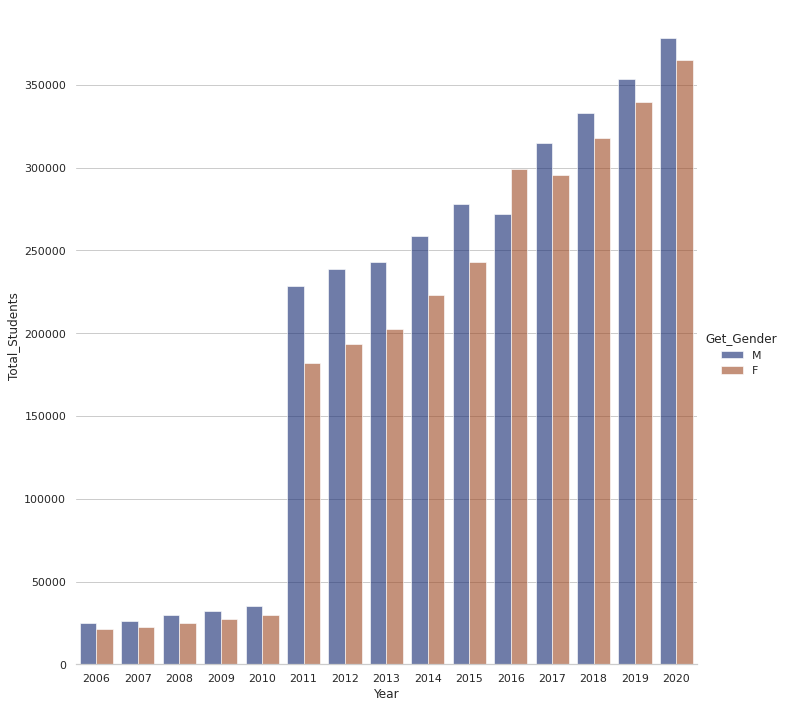

In [28]:
draw_catplot(BOTH_DF,'Year','Total_Students','Get_Gender',height=10)

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


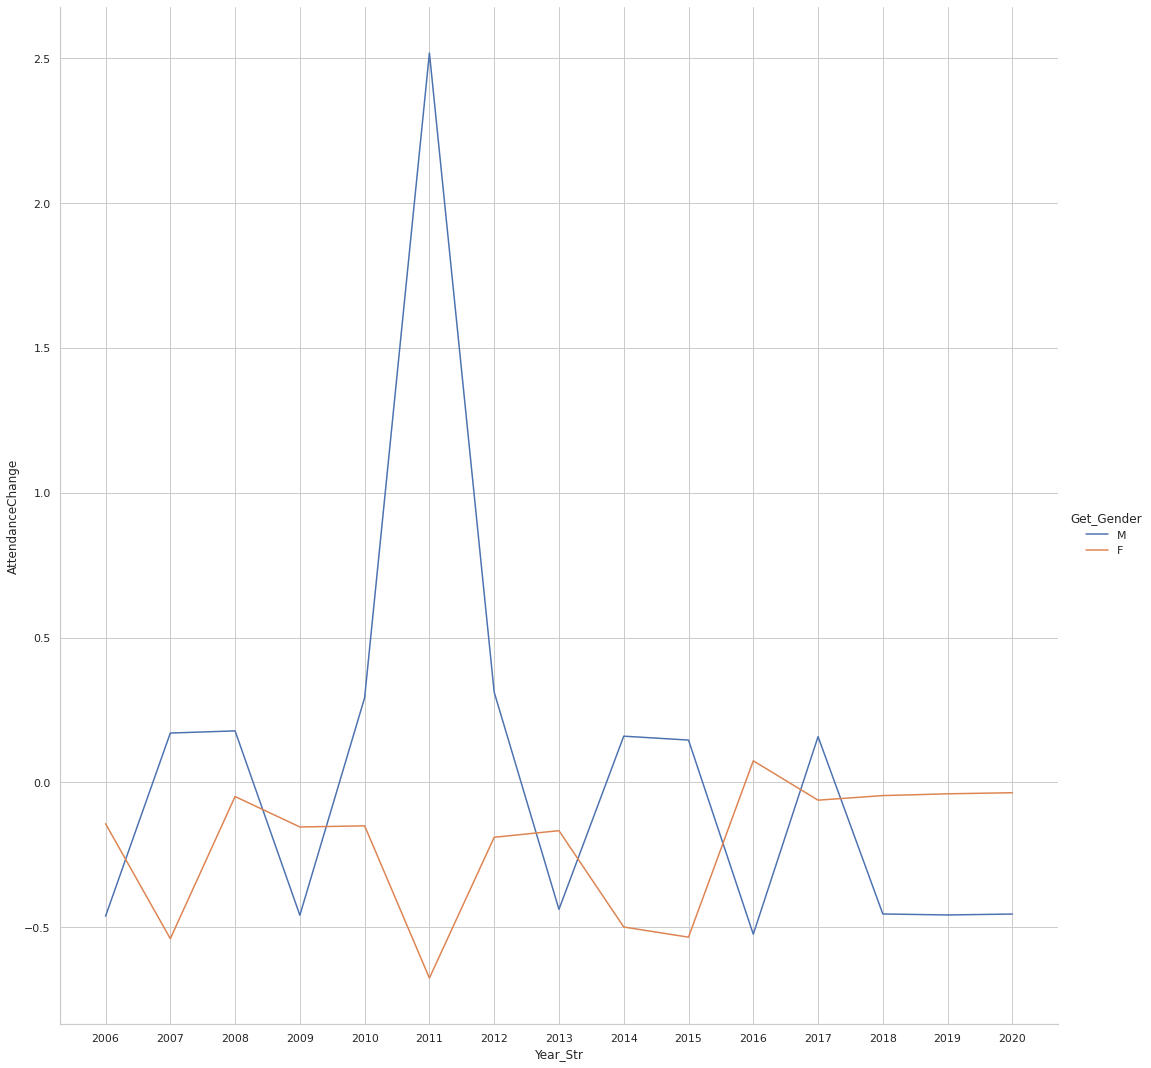

In [29]:
plot_replot(BOTH_DF,'Year_Str','AttendanceChange','Get_Gender')

Findings:

- After 2010, the number of kcse students dramatically increased.In 2003, the governemnt introduced free primary education and in 2008 free secondary day school education. This factors can be attributed to the number of students having shot up
- In 2016 more female students sat for the exams as compared to male students

## Change in performance for both genders ✅

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


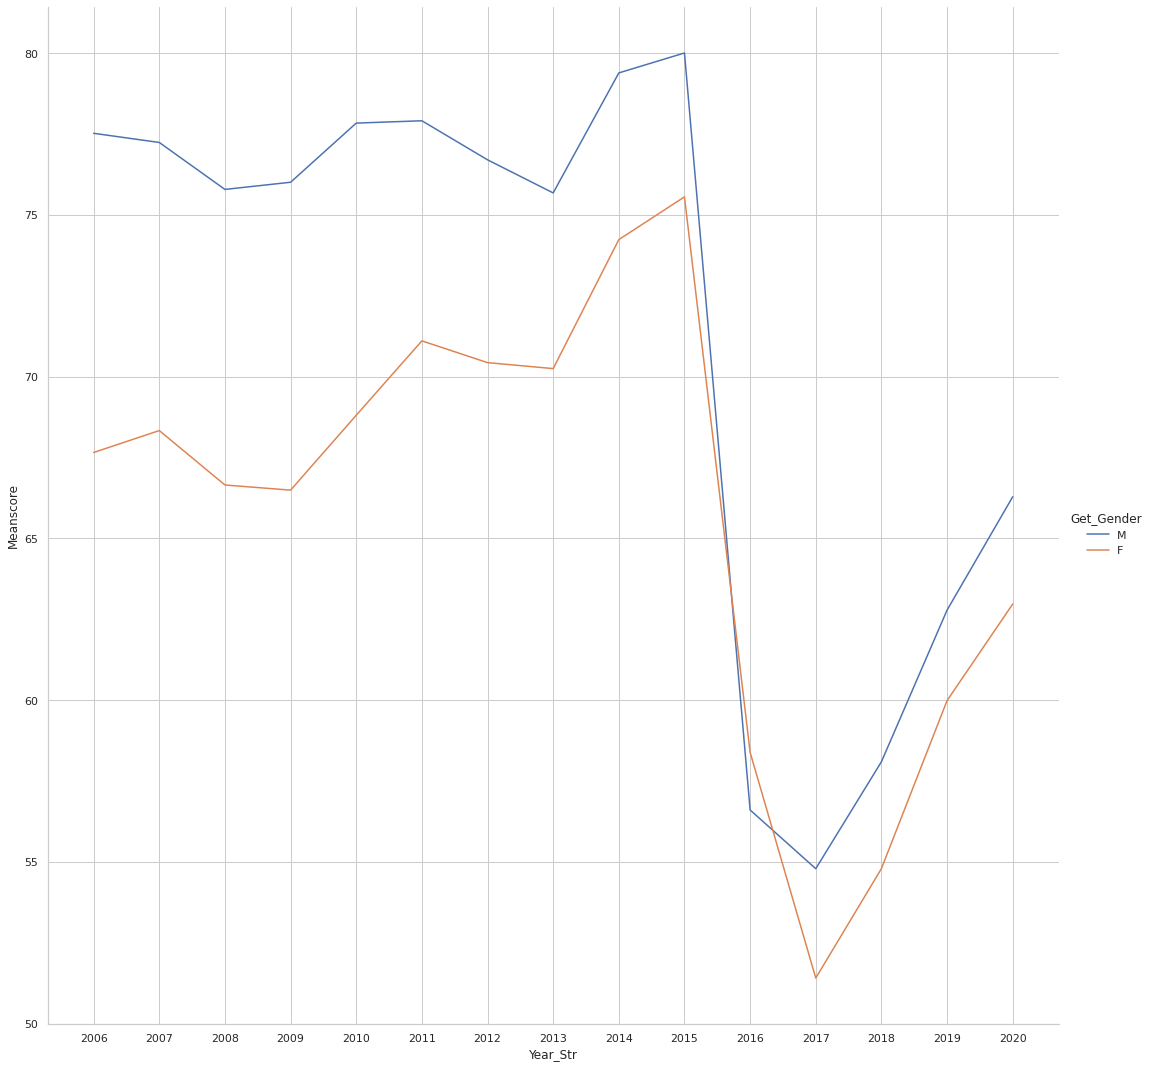

In [30]:
plot_replot(BOTH_DF,'Year_Str','Meanscore','Get_Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


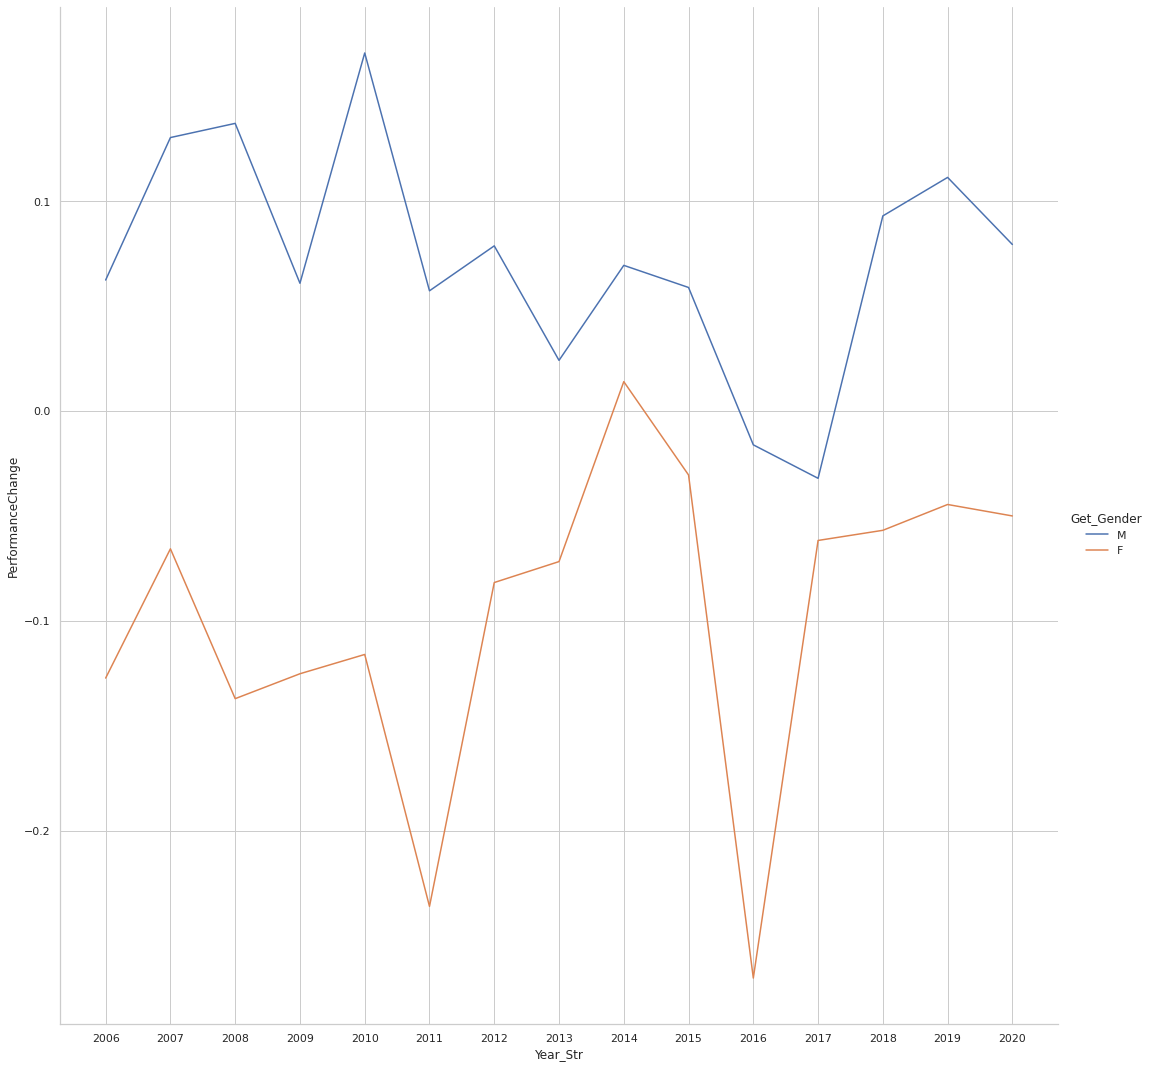

In [31]:
plot_replot(BOTH_DF,'Year_Str','PerformanceChange','Get_Gender')

### Findings:
  - Performance declined sharply in 2016. This was also the period CS MAtiangi was the CS for education.
  - In 2016 girls performed the worst

## Comparison of distribution of genders per grade per year✅

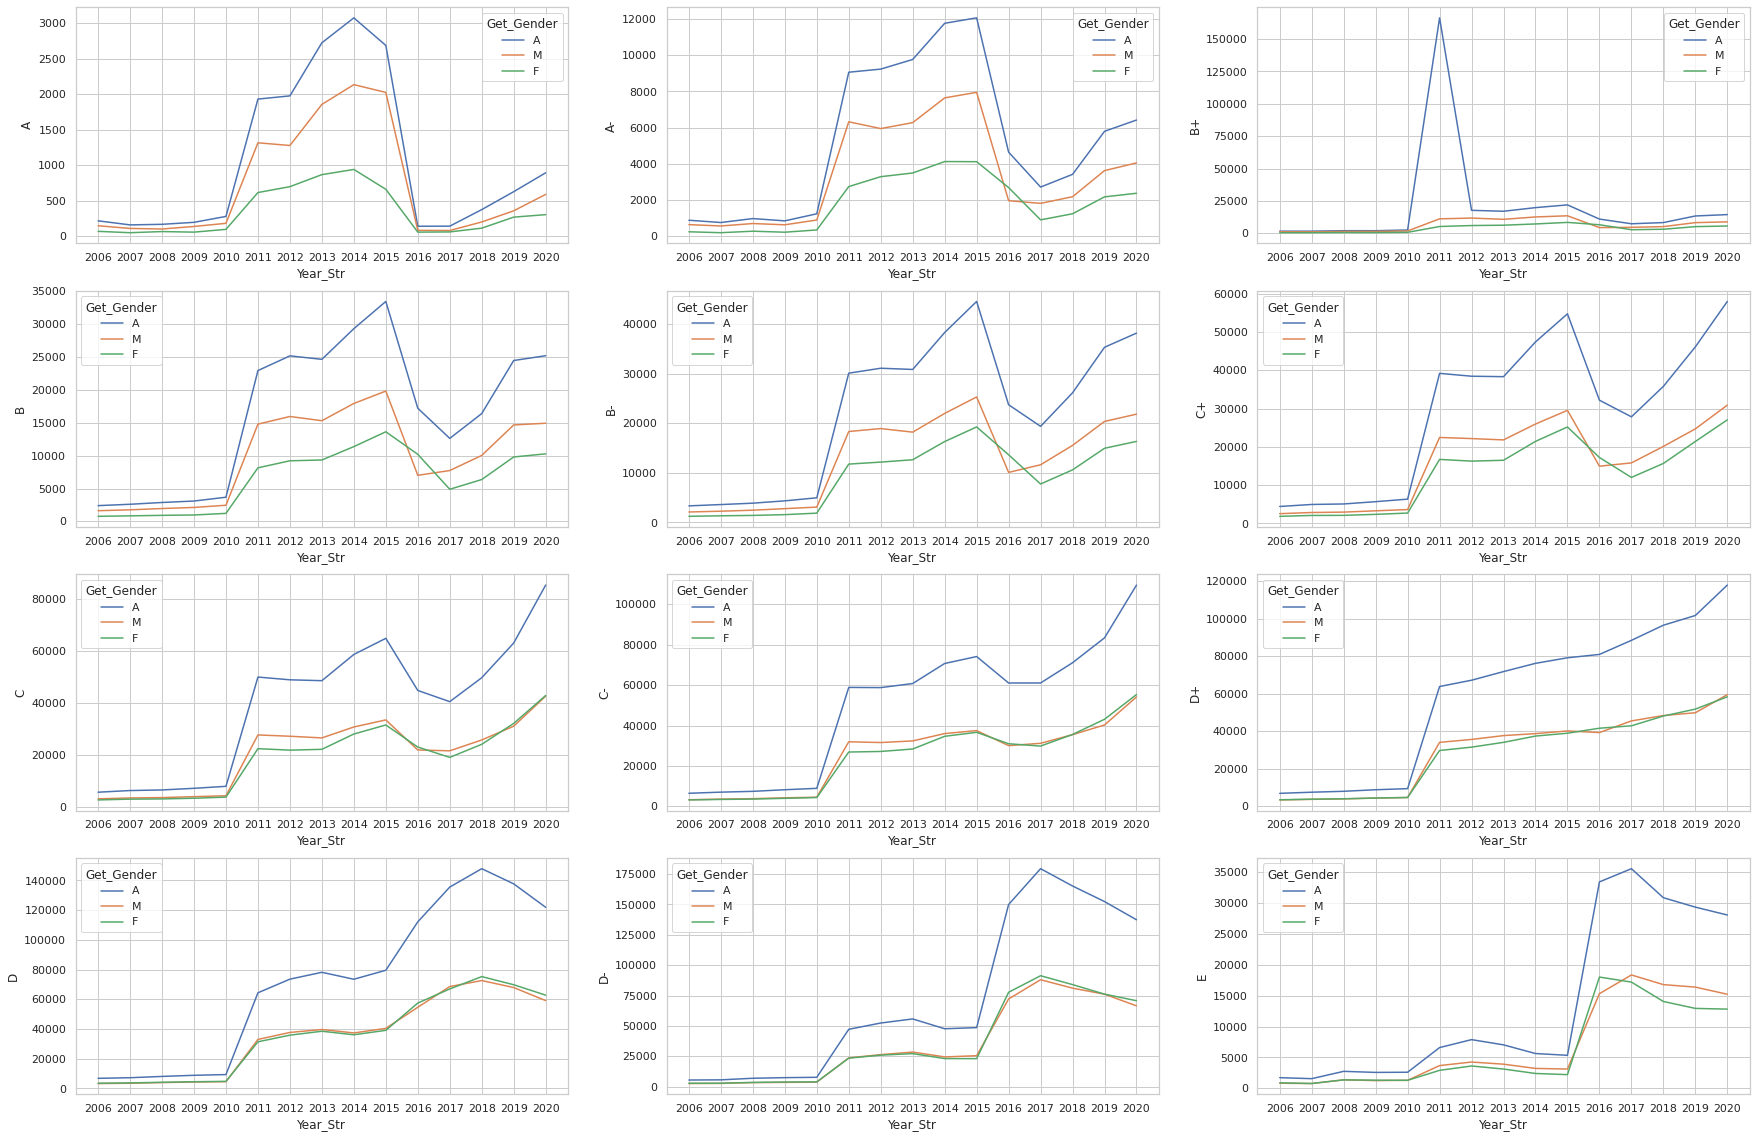

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30,20))
for i,ax in enumerate(axes.flatten()):
    sns.lineplot(data=df, x="Year_Str", y=grades[i], hue="Get_Gender",ax=ax)


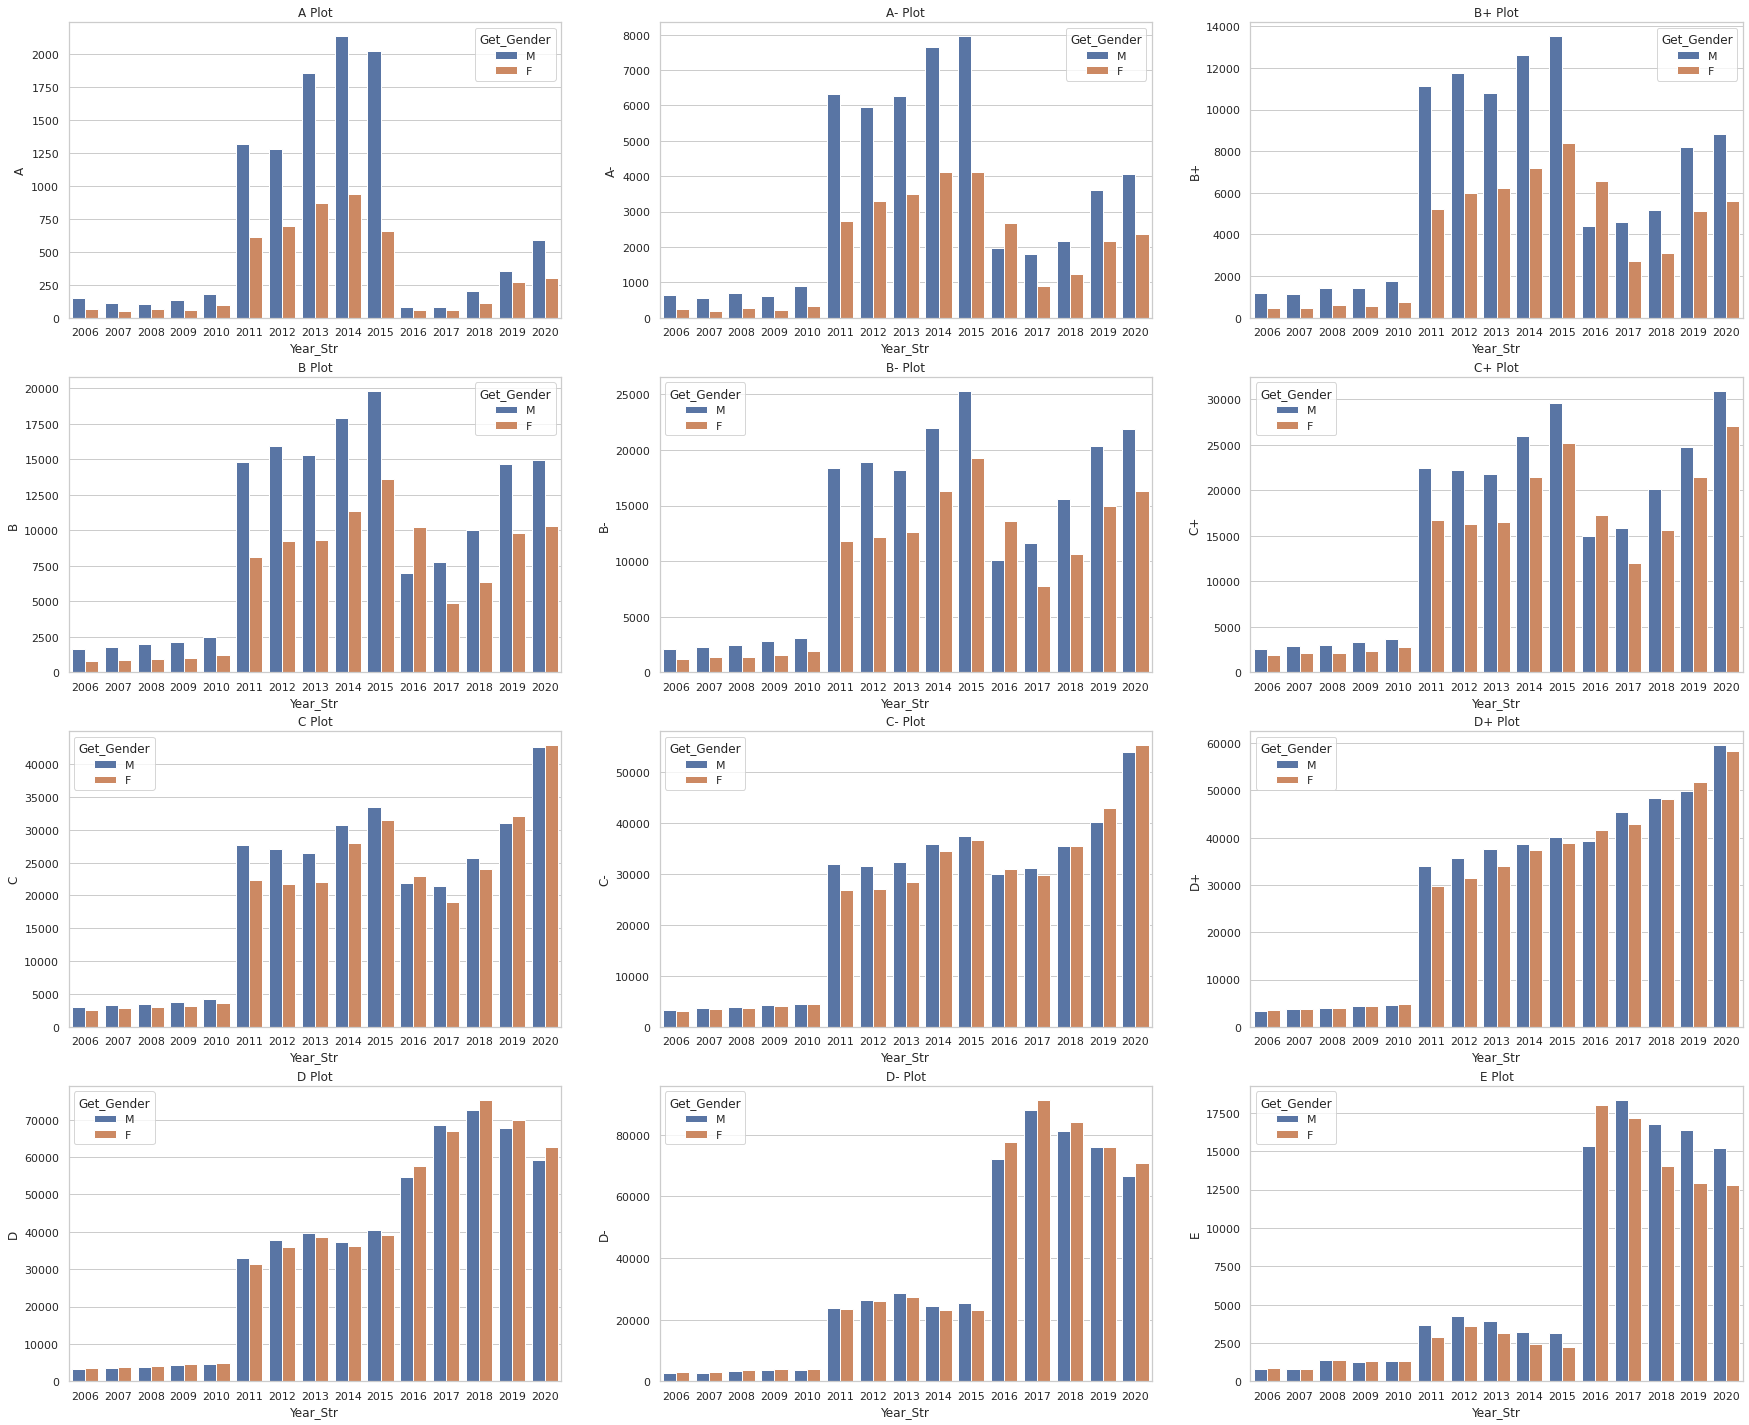

In [33]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30,25))
for i,ax in enumerate(axes.flatten()):
    # sns.lineplot(data=df, x="Year_Str", y=grades[i], hue="Get_Gender",ax=ax)

    draw_bar_plot(BOTH_DF,'Year_Str',grades[i],'Get_Gender',f"{grades[i]} Plot",ax=ax)

Findings:

   - On average boys have high numbers in every grade
   - 2011 to 2015 more boys had A's as compared to girls, but come 2016 when the rate of exam cheating was very low, the number of A's between girls and boys was very close. Would this mean in general boys cheat one xams more than girls?
   - In 2016 more females had E's than males. It was also the only year the number of E's was higher for females than male.


## Yearly gender that performed the best✅

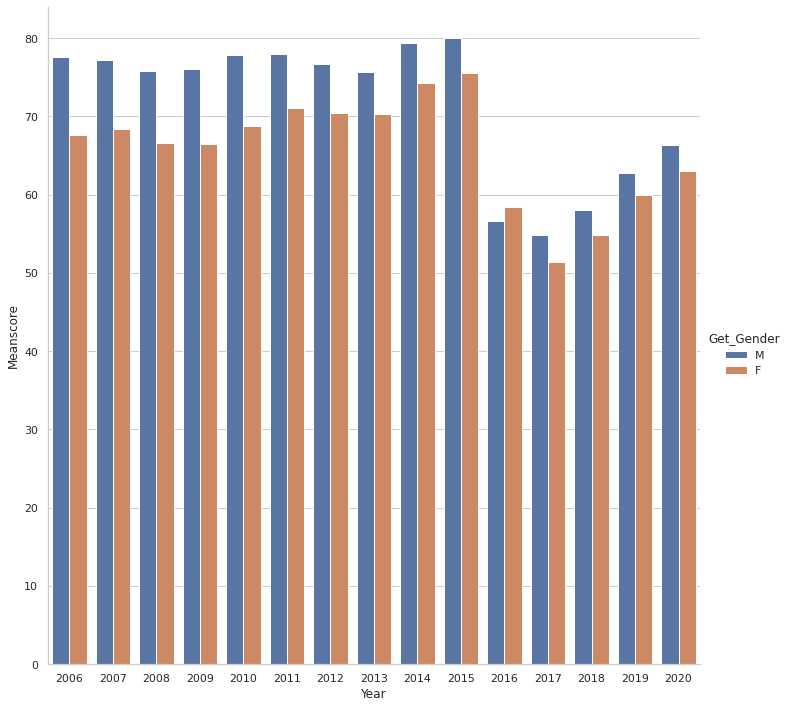

In [34]:
sns.catplot(x="Year", y="Meanscore", hue="Get_Gender",kind="bar", data=BOTH_DF, height=10)

Findings

  - In 2016 girls performed better than boys
  - All other years apart from 2016, men exceed the ladies

## Overall performance yearly✅

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


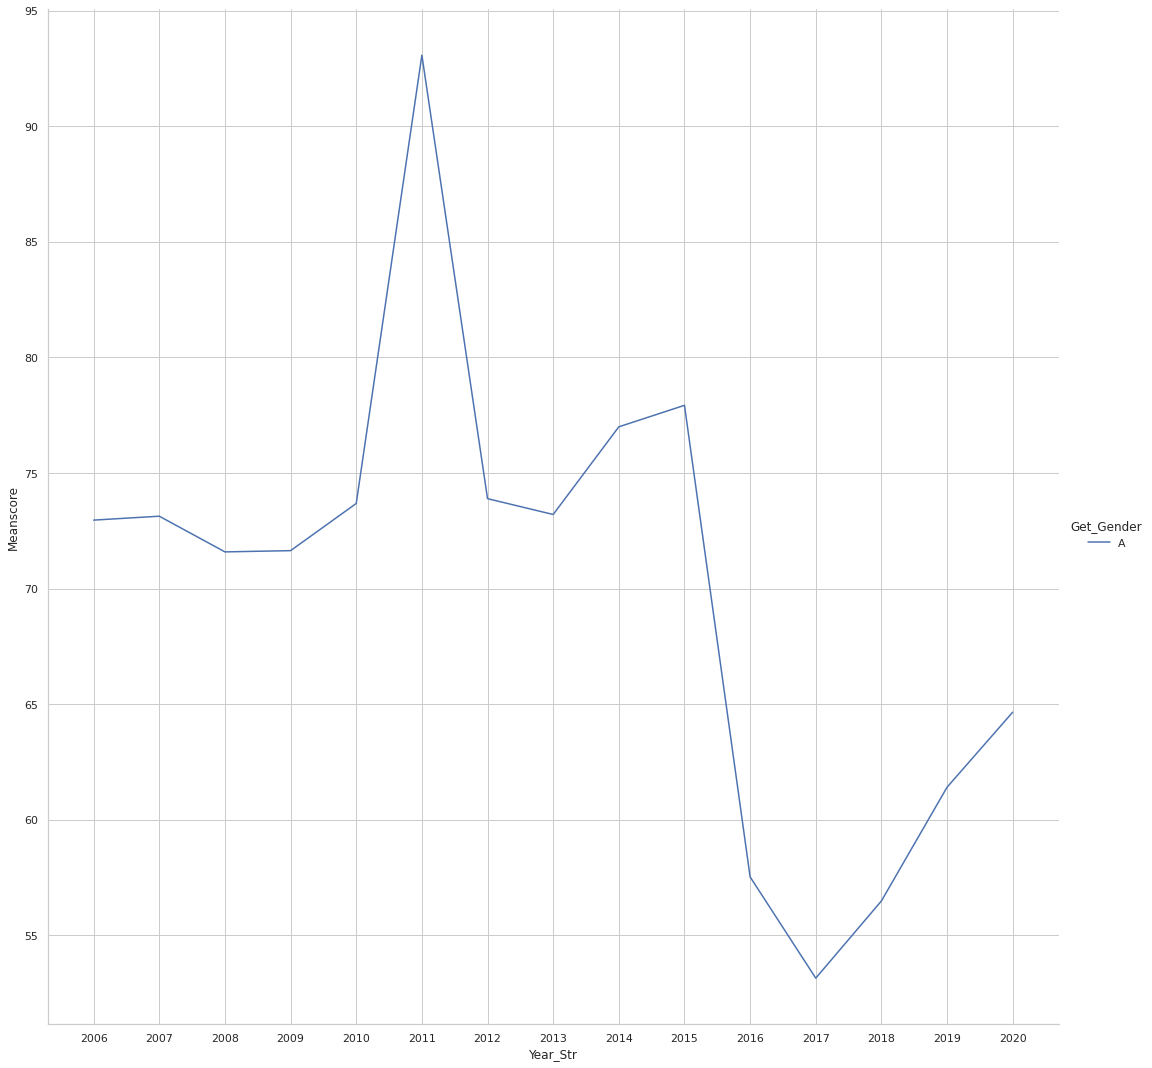

In [35]:
plot_replot(ALL_DF,'Year_Str','Meanscore','Get_Gender')

Findings:

  - 2011 was the best overall performing year
  - 2017 was the worst performing year overall